In [ ]:
import tweepy
import json
import matplotlib.pyplot as plt 
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from PIL import Image
from operator import itemgetter 
import re 
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import nltk
import tensorflow as tf
import csv

# Get Twitter Data

In [108]:
consumer_key = "consumer_key"
consumer_secret ="consumer_secret"
access_token ="access_token"
access_token_secret ="access_token_secret"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
woeid_delhi = "20070458"
tags_delhi = api.trends_place(woeid_delhi)

In [14]:
woeid_hyderabad = "2295414"
tags_hyderabad = api.trends_place(woeid_hyderabad)

In [ ]:
tags_delhi = tags_delhi[0]
trends_delhi = tags_delhi['trends']

In [ ]:
tags_hyderabad = tags_hyderabad[0]
trends_hyderabad = tags_hyderabad['trends']

In [ ]:
trends = []
for elt in trends_delhi:
    if elt['tweet_volume'] != None:
        trends.append(elt)
for elt in trends_hyderabad:
    if elt['tweet_volume'] != None:
        trends.append(elt)

In [ ]:
from operator import itemgetter 
sorted_trends = sorted(trends, key=itemgetter('tweet_volume'),reverse = True)

# Top trending hashtag: #BB14TheRKVShow

In [ ]:
search_word = "#BB14TheRKVShow"
num_tweets = 1000
all_json_data = []
while(True):
    tweets = tweepy.Cursor(api.search, q=search_word).items(num_tweets)
    try:
        all_json_data.extend([tweet._json for tweet in tweets])
    except tweepy.TweepError:
        pass
    if len(all_json_data) >= 12000:
        break
my_list = {'tweets_json':all_json_data}
with open('data.json', 'w') as f:
    json.dump(my_list, f)

# Users Analysis

In [2]:
with open('data.json') as f:
    data = json.load(f)

In [25]:
print('Number of tweets:', len(data['tweets_json']))

Number of tweets: 12000


In [3]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

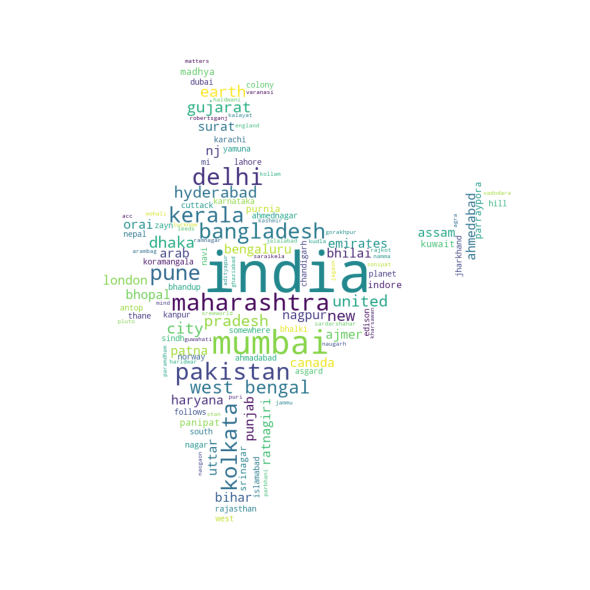

In [45]:
stopwords = set(STOPWORDS) 

s = set()
for elt in data['tweets_json']:
    location = elt['user']['location']
    if len(location) > 1 and isEnglish(location):
        s.add(location.lower())

locations = ''
for elt in s:
    locations += elt + " "
    
mask = np.array(Image.open('./india.jpeg'))
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10, mask=mask).generate(locations)   

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [ ]:
protected = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['protected']:
        protected['Yes'] += 1
    else:
        protected['No'] += 1
protected

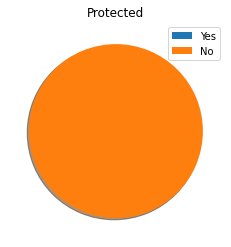

In [46]:
patches, texts = plt.pie(protected.values(), shadow=True)
plt.legend(patches, protected.keys(), loc='best')
plt.title('Protected')
plt.show()

In [ ]:
verified = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['verified']:
        verified['Yes'] += 1
    else:
        verified['No'] += 1
verified

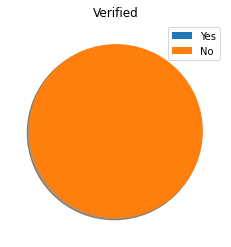

In [49]:
patches, texts = plt.pie(verified.values(), shadow=True)
plt.legend(patches, verified.keys(), loc='best')
plt.title('Verified')
plt.show()

In [ ]:
is_translator = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['is_translator']:
        is_translator['Yes'] += 1
    else:
        is_translator['No'] += 1
is_translator

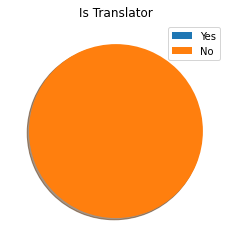

In [142]:
patches, texts = plt.pie(is_translator.values(), shadow=True)
plt.legend(patches, is_translator.keys(), loc='best')
plt.title('Is Translator')
plt.show()

In [ ]:
is_translation_enabled = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['is_translation_enabled']:
        is_translation_enabled['Yes'] += 1
    else:
        is_translation_enabled['No'] += 1
is_translation_enabled

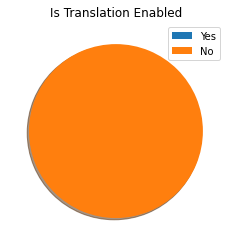

In [143]:
patches, texts = plt.pie(is_translation_enabled.values(), shadow=True)
plt.legend(patches, is_translation_enabled.keys(), loc='best')
plt.title('Is Translation Enabled')
plt.show()

In [ ]:
contributors_enabled = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['contributors_enabled']:
        contributors_enabled['Yes'] += 1
    else:
        contributors_enabled['No'] += 1
contributors_enabled

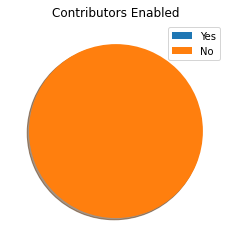

In [5]:
patches, texts = plt.pie(contributors_enabled.values(), shadow=True)
plt.legend(patches, contributors_enabled.keys(), loc='best')
plt.title('Contributors Enabled')
plt.show()

In [ ]:
geo_enabled = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['geo_enabled']:
        geo_enabled['Yes'] += 1
    else:
        geo_enabled['No'] += 1
geo_enabled

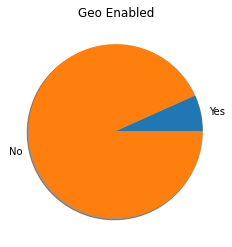

In [6]:
plt.pie(geo_enabled.values(), labels = geo_enabled.keys(), shadow=True)
plt.title('Geo Enabled')
plt.show()

In [ ]:
has_extended_profile = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['has_extended_profile']:
        has_extended_profile['Yes'] += 1
    else:
        has_extended_profile['No'] += 1
has_extended_profile

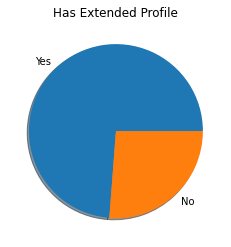

In [7]:
plt.pie(has_extended_profile.values(), labels = has_extended_profile.keys(), shadow=True)
plt.title('Has Extended Profile')
plt.show()

In [11]:
listed_count = []
for elt in data['tweets_json']:
    if elt['user']['listed_count'] != None:
        listed_count.append(elt['user']['listed_count'])
        
print('Listed count max:', max(listed_count))
print('Listed count min:', min(listed_count))
print('Listed count mean:', np.mean(listed_count))
print('Listed count median:', np.median(listed_count))
print('Listed count std:', np.std(listed_count))

Listed count max: 191
Listed count min: 0
Listed count mean: 0.11225
Listed count median: 0.0
Listed count std: 2.686413334572077


(array([1.1988e+04, 6.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <BarContainer object of 10 artists>)

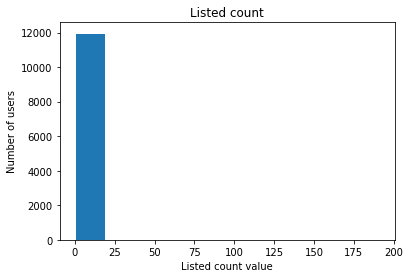

In [9]:
plt.title('Listed count')
plt.xlabel('Listed count value')
plt.ylabel('Number of users')
plt.hist(listed_count, edgecolor='white')

(array([1.1988e+04, 6.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  19.1,  38.2,  57.3,  76.4,  95.5, 114.6, 133.7, 152.8,
        171.9, 191. ]),
 <BarContainer object of 10 artists>)

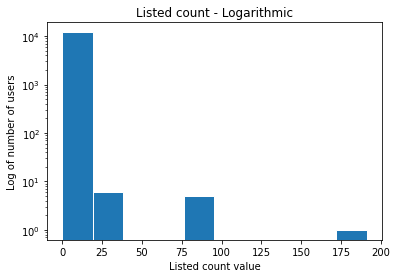

In [10]:
plt.title('Listed count - Logarithmic')
plt.xlabel('Listed count value')
plt.ylabel('Log of number of users')
plt.hist(listed_count, log=True, edgecolor='white')

In [12]:
statuses_count = []
for elt in data['tweets_json']:
    if elt['user']['statuses_count'] != None:
        statuses_count.append(elt['user']['statuses_count'])
        
print('Status count max:', max(statuses_count))
print('Status count min:', min(statuses_count))
print('Status count mean:', np.mean(statuses_count))
print('Status count median:', np.median(statuses_count))
print('Status count std:', np.std(statuses_count))

Status count max: 159394
Status count min: 1
Status count mean: 6009.862083333333
Status count median: 2331.0
Status count std: 11390.029729368385


(array([1.095e+04, 7.000e+02, 1.440e+02, 8.300e+01, 4.200e+01, 5.800e+01,
        1.600e+01, 0.000e+00, 2.000e+00, 5.000e+00]),
 array([1.000000e+00, 1.594030e+04, 3.187960e+04, 4.781890e+04,
        6.375820e+04, 7.969750e+04, 9.563680e+04, 1.115761e+05,
        1.275154e+05, 1.434547e+05, 1.593940e+05]),
 <BarContainer object of 10 artists>)

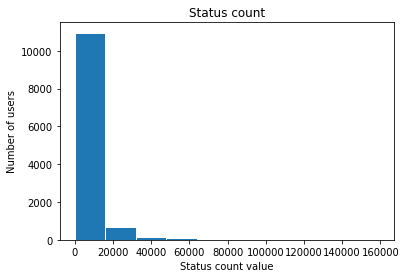

In [13]:
plt.title('Status count')
plt.xlabel('Status count value')
plt.ylabel('Number of users')
plt.hist(statuses_count, edgecolor='white')

(array([1.095e+04, 7.000e+02, 1.440e+02, 8.300e+01, 4.200e+01, 5.800e+01,
        1.600e+01, 0.000e+00, 2.000e+00, 5.000e+00]),
 array([1.000000e+00, 1.594030e+04, 3.187960e+04, 4.781890e+04,
        6.375820e+04, 7.969750e+04, 9.563680e+04, 1.115761e+05,
        1.275154e+05, 1.434547e+05, 1.593940e+05]),
 <BarContainer object of 10 artists>)

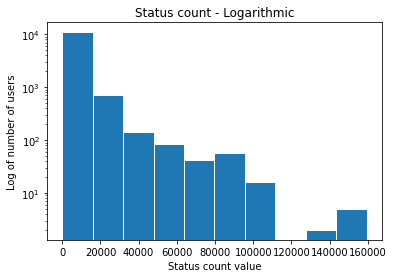

In [14]:
plt.title('Status count - Logarithmic')
plt.xlabel('Status count value')
plt.ylabel('Log of number of users')
plt.hist(statuses_count, log=True, edgecolor='white')

In [15]:
favourites_count = []
for elt in data['tweets_json']:
    if elt['user']['favourites_count'] != None:
        favourites_count.append(elt['user']['favourites_count'])
        
print('Favourites count max:', max(favourites_count))
print('Favourites count min:', min(favourites_count))
print('Favourites count mean:', np.mean(favourites_count))
print('Favourites count median:', np.median(favourites_count))
print('Favourites count std:', np.std(favourites_count))

Favourites count max: 277468
Favourites count min: 0
Favourites count mean: 4977.798666666667
Favourites count median: 504.5
Favourites count std: 16988.42651178928


(array([1.1532e+04, 2.4600e+02, 1.3300e+02, 1.6000e+01, 4.8000e+01,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01]),
 array([     0. ,  27746.8,  55493.6,  83240.4, 110987.2, 138734. ,
        166480.8, 194227.6, 221974.4, 249721.2, 277468. ]),
 <BarContainer object of 10 artists>)

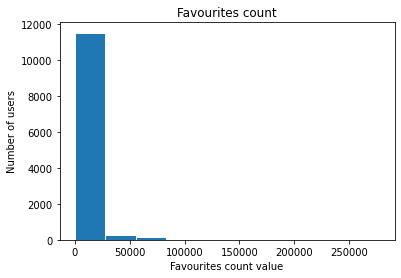

In [16]:
plt.title('Favourites count')
plt.xlabel('Favourites count value')
plt.ylabel('Number of users')
plt.hist(favourites_count, edgecolor='white')

(array([1.1532e+04, 2.4600e+02, 1.3300e+02, 1.6000e+01, 4.8000e+01,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01]),
 array([     0. ,  27746.8,  55493.6,  83240.4, 110987.2, 138734. ,
        166480.8, 194227.6, 221974.4, 249721.2, 277468. ]),
 <BarContainer object of 10 artists>)

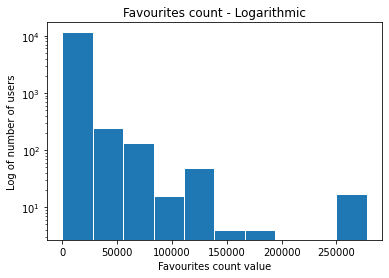

In [17]:
plt.title('Favourites count - Logarithmic')
plt.xlabel('Favourites count value')
plt.ylabel('Log of number of users')
plt.hist(favourites_count, log=True, edgecolor='white')

In [96]:
years = {}
for elt in data['tweets_json']:
    created_at = elt['user']['created_at']
    if created_at != None:
        splitted = created_at.split()
        if splitted[-1] in years:
            years[splitted[-1]] += 1
        else:
            years[splitted[-1]] = 1

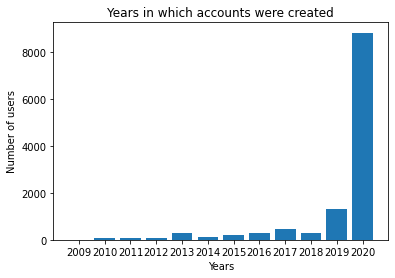

In [98]:
years = dict(sorted(years.items(), key = itemgetter(0)))

plt.bar(range(len(years)), list(years.values()), align='center')
plt.xticks(range(len(years)), list(years.keys()))
plt.title('Years in which accounts were created')
plt.xlabel('Years')
plt.ylabel('Number of users')
plt.show()

In [ ]:
profile_background_image_url = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['profile_background_image_url'] != None:
        profile_background_image_url['Yes'] += 1
    else:
        profile_background_image_url['No'] += 1
profile_background_image_url

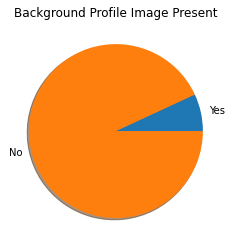

In [123]:
plt.pie(profile_background_image_url.values(), labels = profile_background_image_url.keys(), shadow=True)
plt.title('Background Profile Image Present')
plt.show()

In [ ]:
profile_image_url = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['profile_image_url'] != None:
        profile_image_url['Yes'] += 1
    else:
        profile_image_url['No'] += 1
profile_image_url

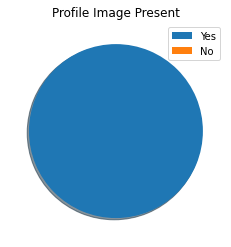

In [124]:
patches, texts = plt.pie(profile_image_url.values(), shadow=True)
plt.legend(patches, profile_image_url.keys(), loc='best')
plt.title('Profile Image Present')
plt.show()

In [ ]:
default_profile = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['default_profile']:
        default_profile['Yes'] += 1
    else:
        default_profile['No'] += 1
default_profile

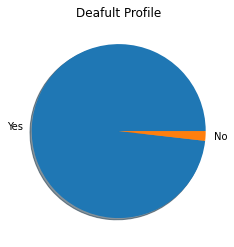

In [112]:
plt.pie(default_profile.values(), labels = default_profile.keys(), shadow=True)
plt.title('Deafult Profile')
plt.show()

In [ ]:
default_profile_image = {'Yes':0, 'No':0}
for elt in data['tweets_json']:
    if elt['user']['default_profile_image']:
        default_profile_image['Yes'] += 1
    else:
        default_profile_image['No'] += 1
default_profile_image

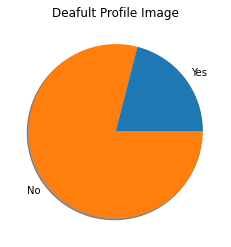

In [114]:
plt.pie(default_profile_image.values(), labels = default_profile_image.keys(), shadow=True)
plt.title('Deafult Profile Image')
plt.show()

# Followers and Friends

In [18]:
followers_count = []
for elt in data['tweets_json']:
    followers_count.append(elt['user']['followers_count'])

print('Followers count max:', max(followers_count))
print('Followers count min:', min(followers_count))
print('Followers count mean:', np.mean(followers_count))
print('Followers count median:', np.median(followers_count))
print('Followers count std:', np.std(followers_count)) 

Followers count max: 14933
Followers count min: 0
Followers count mean: 171.71291666666667
Followers count median: 57.0
Followers count std: 518.013961845135


(array([1.184e+04, 1.150e+02, 3.300e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 5.000e+00, 2.000e+00]),
 array([    0. ,  1493.3,  2986.6,  4479.9,  5973.2,  7466.5,  8959.8,
        10453.1, 11946.4, 13439.7, 14933. ]),
 <BarContainer object of 10 artists>)

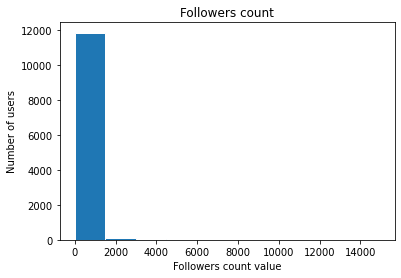

In [19]:
plt.title('Followers count')
plt.xlabel('Followers count value')
plt.ylabel('Number of users')
plt.hist(followers_count, edgecolor='white')

(array([1.184e+04, 1.150e+02, 3.300e+01, 0.000e+00, 1.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 5.000e+00, 2.000e+00]),
 array([    0. ,  1493.3,  2986.6,  4479.9,  5973.2,  7466.5,  8959.8,
        10453.1, 11946.4, 13439.7, 14933. ]),
 <BarContainer object of 10 artists>)

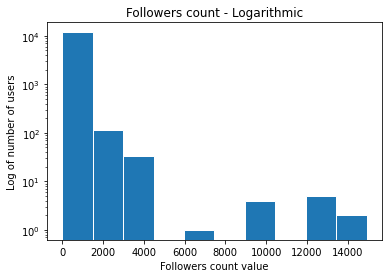

In [20]:
plt.title('Followers count - Logarithmic')
plt.xlabel('Followers count value')
plt.ylabel('Log of number of users')
plt.hist(followers_count, log=True, edgecolor='white')

In [21]:
friends_count = []
for elt in data['tweets_json']:
    friends_count.append(elt['user']['friends_count'])

print('Friends count max:', max(friends_count))
print('Friends count min:', min(friends_count))
print('Friends count mean:', np.mean(friends_count))
print('Friends count median:', np.median(friends_count))
print('Friends count std:', np.std(friends_count))

Friends count max: 5002
Friends count min: 0
Friends count mean: 166.93791666666667
Friends count median: 83.0
Friends count std: 282.71212548396244


(array([1.112e+04, 7.330e+02, 6.700e+01, 5.300e+01, 1.000e+00, 5.000e+00,
        0.000e+00, 1.700e+01, 1.000e+00, 3.000e+00]),
 array([   0. ,  500.2, 1000.4, 1500.6, 2000.8, 2501. , 3001.2, 3501.4,
        4001.6, 4501.8, 5002. ]),
 <BarContainer object of 10 artists>)

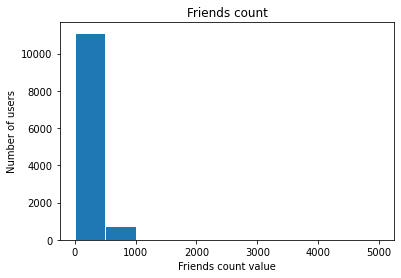

In [22]:
plt.title('Friends count')
plt.xlabel('Friends count value')
plt.ylabel('Number of users')
plt.hist(friends_count, edgecolor='white')

(array([1.112e+04, 7.330e+02, 6.700e+01, 5.300e+01, 1.000e+00, 5.000e+00,
        0.000e+00, 1.700e+01, 1.000e+00, 3.000e+00]),
 array([   0. ,  500.2, 1000.4, 1500.6, 2000.8, 2501. , 3001.2, 3501.4,
        4001.6, 4501.8, 5002. ]),
 <BarContainer object of 10 artists>)

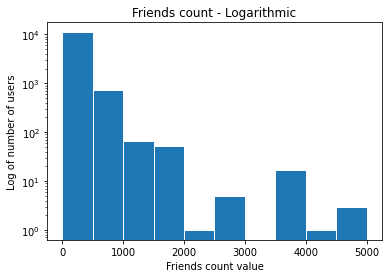

In [23]:
plt.title('Friends count - Logarithmic')
plt.xlabel('Friends count value')
plt.ylabel('Log of number of users')
plt.hist(friends_count, log=True, edgecolor='white')

# Language Aspect

In [133]:
languages = {}
for elt in data['tweets_json']:
    if elt['lang'] in languages:
        languages[elt['lang']] += 1
    else:
        languages[elt['lang']] = 1
languages

{'und': 332,
 'en': 9812,
 'hi': 862,
 'nl': 45,
 'da': 7,
 'fr': 13,
 'et': 315,
 'in': 254,
 'tl': 229,
 'fi': 9,
 'eu': 3,
 'ht': 50,
 'cy': 2,
 'pt': 6,
 'ro': 5,
 'is': 1,
 'hu': 7,
 'de': 7,
 'sv': 9,
 'tr': 1,
 'pl': 7,
 'es': 2,
 'no': 1,
 'lt': 5,
 'it': 5,
 'sl': 3,
 'or': 3,
 'ca': 4,
 'ja': 1}

In [134]:
print('English percentage:', languages['en']/sum(languages.values())*100)

English percentage: 81.76666666666667


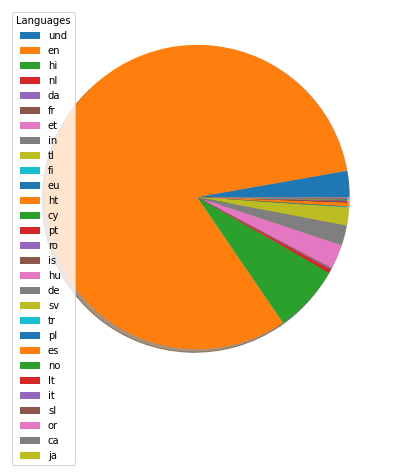

In [141]:
fig = plt.figure(figsize =(10, 7)) 
patches, texts = plt.pie(languages.values(), shadow=True)
plt.legend(patches, languages.keys(), loc='best', title='Languages')
plt.show()

# Embedding Generation

In [8]:
text = []
for elt in data['tweets_json']:
    to_add = elt['text']
    to_add = to_add.replace('\n', ' ')
    to_add = to_add.replace('\t', ' ')
    to_add = re.sub(' +', ' ', to_add)    # remove extra spaces
    to_add = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', to_add) # remove website URL
    to_add = re.sub(r'http\S+', '', to_add)   
    to_add = re.sub('@[^\s]+', '', to_add)   # remove username
    to_add = re.sub(r'[^\w\s]', '', to_add)  # remove punctuation
    text.append(to_add.lower())

In [9]:
tk = TweetTokenizer()
stop_words = set(stopwords.words('english'))

sentences = []
for elt in text:
    temp = []
    tokens = tk.tokenize(elt)
    for sub_elt in tokens:
        if (sub_elt not in stop_words) and (not sub_elt.isdigit()) and (len(sub_elt)>1) and isEnglish(sub_elt):
            temp.append(sub_elt)
    sentences.append(temp)

In [10]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=sentences, size=100, window=5, min_count=1, workers=4)
model.save("embeddings.model")

In [11]:
max_size = len(model.wv.vocab)-1
w2v = np.zeros((max_size, model.trainables.layer1_size))

In [12]:
with open('projections/metadata.tsv', 'w+') as file_metadata:
    for i, word in enumerate(model.wv.index2word[:max_size]):
        w2v[i] = model.wv[word]
        file_metadata.write(word + '\n')

In [13]:
with open('projections/vectors.tsv', 'w+') as file_vectors:
    csv_writer = csv.writer(file_vectors, delimiter='\t')
    csv_writer.writerows(w2v)

In [ ]:
import os
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import numpy as np

PATH = os.getcwd()

LOG_DIR = PATH + '/projections/Log/'
metadata = 'metadata_word2vec.tsv'

import pandas as pd
A=pd.read_csv("projections/vectors.tsv",sep="\t",header=None)

embeddings=tf.Variable(A)

with tf.Session() as sess:
    saver = tf.train.Saver([embeddings])

    sess.run(embeddings.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'embeddings.ckpt'))

    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embeddings.name
    embedding.metadata_path = metadata
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)